In [1]:
import cv2
import numpy as np

def dark_channel(img, size=15):
    min_channel = np.min(img, axis=2)
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (size, size))
    return cv2.erode(min_channel, kernel)

def dehaze(img, omega=0.95, size=15):
    dark = dark_channel(img, size)
    atmospheric_light = np.max(dark)
    transmission = 1 - omega * (dark / atmospheric_light)
    transmission = np.clip(transmission, 0.1, 1)

    transmission = np.expand_dims(transmission, axis=2)
    dehazed = (img - atmospheric_light) / transmission + atmospheric_light
    return np.clip(dehazed, 0, 255).astype(np.uint8)

img = cv2.imread("hazy_image.jpg")
dehazed_img = dehaze(img)
cv2.imwrite("dehazed_image.jpg", dehazed_img)


In [3]:
import cv2
import numpy as np
import os
from tqdm import tqdm

# Function to apply haze effect
def add_haze(image, intensity=0.5):
    """
    Adds haze (fog) to an image.
    intensity: Controls haze level (0 = no haze, 1 = maximum haze)
    """
    h, w, c = image.shape
    haze_layer = np.full((h, w, c), 255, dtype=np.uint8)  # White haze layer
    hazy_image = cv2.addWeighted(image, 1 - intensity, haze_layer, intensity, 0)
    return hazy_image

# Main function to process images
def process_images(input_folder, output_folder, haze_levels=5):
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    image_files = [f for f in os.listdir(input_folder) if f.endswith(('.png', '.jpg', '.jpeg'))]

    for level in tqdm(range(1, haze_levels + 1)):
        haze_intensity = level * 0.2  # Increasing haze level gradually
        level_folder = os.path.join(output_folder, f"Haze_Level_{int(haze_intensity * 100)}")
        os.makedirs(level_folder, exist_ok=True)

        for image_file in image_files:
            image_path = os.path.join(input_folder, image_file)
            image = cv2.imread(image_path)

            # Apply haze effect
            hazy_image = add_haze(image, intensity=haze_intensity)

            output_path = os.path.join(level_folder, image_file)
            cv2.imwrite(output_path, hazy_image)

# Example Usage
input_folder = "flickr30k_images/flickr30k_images"  # Folder containing original images
output_folder = "noise/hazy_images"  # Folder where processed images will be saved

process_images(input_folder, output_folder, haze_levels=5)


100%|██████████| 5/5 [06:09<00:00, 73.85s/it]


In [7]:
from augmentations.haze import add_haze

import cv2
from augmentations.blur import apply_blur
from augmentations.snowing import add_snow
from augmentations.shadowing import add_shadow
import matplotlib.pyplot as plt

In [3]:
image = cv2.imread("data/flickr30k_images/flickr30k_images/65567.jpg")
img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

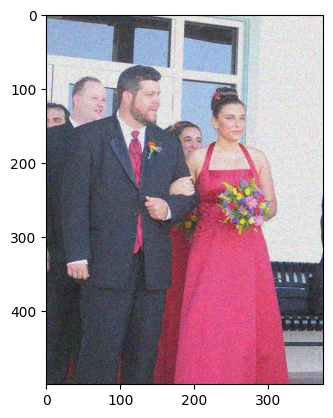

In [3]:
plt.imshow(add_haze(img,0.2))

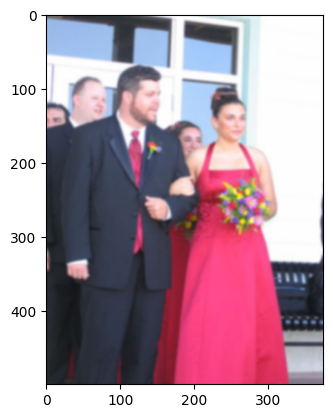

In [6]:
plt.imshow(apply_blur(img,0.2))

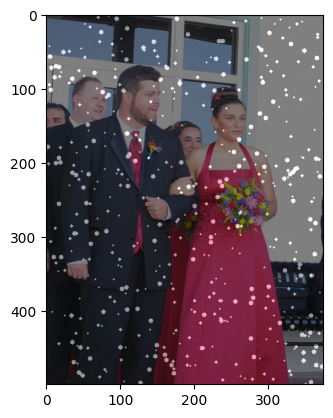

In [5]:
plt.imshow(add_snow(image=img))

In [8]:
plt.imshow(add_shadow(img))

error: OpenCV(4.11.0) /io/opencv/modules/core/src/arithm.cpp:687: error: (-5:Bad argument) When the input arrays in add/subtract/multiply/divide functions have different types, the output array type must be explicitly specified in function 'arithm_op'
